In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D
from tensorflow.keras.optimizers import RMSprop
from matplotlib.pyplot import imshow
import numpy as np

In [18]:
batch_size = 128
num_classes = 10
epochs = 10
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [19]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [20]:
model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [22]:
batch_size = 128
num_classes = 10
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 0.5263 - accuracy: 0.8576 - val_loss: 0.2962 - val_accuracy: 0.9156
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2798 - accuracy: 0.9196 - val_loss: 0.2564 - val_accuracy: 0.9242
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2455 - accuracy: 0.9298 - val_loss: 0.2306 - val_accuracy: 0.9306
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2225 - accuracy: 0.9361 - val_loss: 0.2147 - val_accuracy: 0.9360
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2039 - accuracy: 0.9414 - val_loss: 0.1983 - val_accuracy: 0.9413
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1884 - accuracy: 0.9452 - val_loss: 0.1839 - val_accuracy: 0.9459
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1757 - accuracy: 0.9494 - val_loss: 0.1829 - val_accuracy: 0.9462
Epoch 

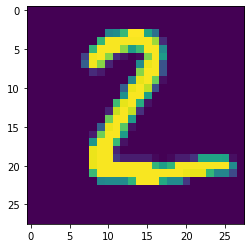

In [23]:
imshow(x_test[1].reshape(28,28))